In [ ]:
#Faiyaz Khan
#lvg182
#CMPT815

In [ ]:
# Clean performance metrics csv
# Python script for processing the file, separating columns, and saving as a new CSV file.

import pandas as pd

# File path for the input and output files
#input_file = 'data/01. Ubuntu 19.10/performance_metrics.csv'
#output_file = 'data/01. Ubuntu 19.10/performance_metrics_cleaned.csv'

# Read the file, using whitespace as the delimiter to separate columns
data = pd.read_csv(input_file, delim_whitespace=True)

# Save the cleaned data to a new CSV file
data.to_csv(output_file, index=False)

# Display the first few rows of the cleaned data to confirm the structure
data.head(), output_file


---
---
# Analysis of Individual Systems

## Ubuntu 18.04.5 LTS

### System Config
- a
- b
- c

   CPU %user %nice %system %iowait %steal  %idle            datetime
0  all  6.73     0    2.36       0      0  90.91 1900-01-01 16:47:10
1  all  6.23     0    3.54       0      0  90.24 1900-01-01 16:47:11
2  all  5.92     0    2.71       0      0  91.37 1900-01-01 16:47:12
3  all  6.88     0    2.85       0      0  90.27 1900-01-01 16:47:13
4  all   6.4     0    2.86       0      0  90.74 1900-01-01 16:47:14
Length of entropy_urandom: 2000
Length of entropy_random: 2000
Length of entropy_rsa: 2000
Length of key_times_urandom: 1000
Length of key_times_random: 1000
Length of key_times_rsa: 1000
   urandom     random   rsa
0      7.0  5886030.0   9.0
1      8.0  6906028.0  11.0
2      8.0  8278900.0  12.0
3      9.0  8540046.0  12.0
4      4.0  9251725.0  17.0


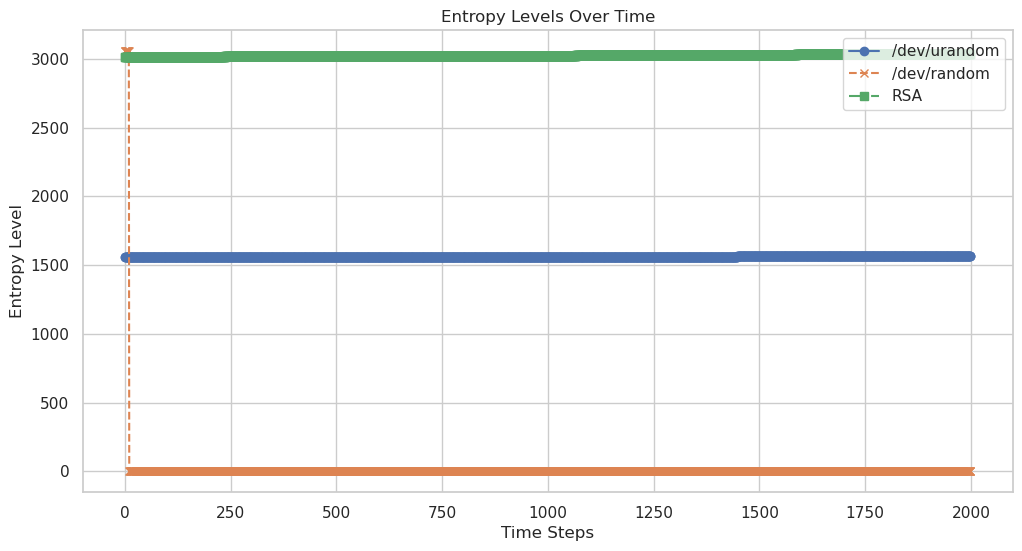

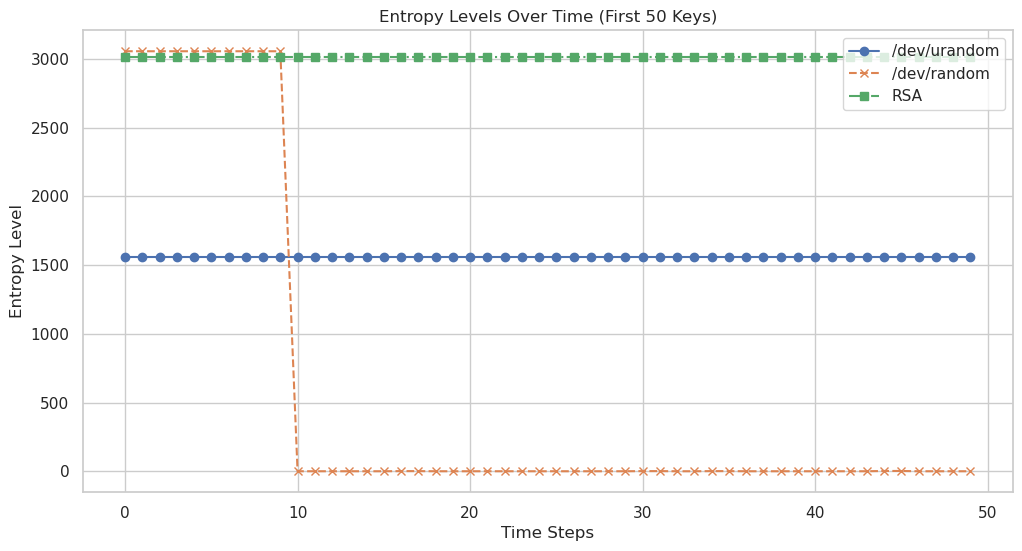

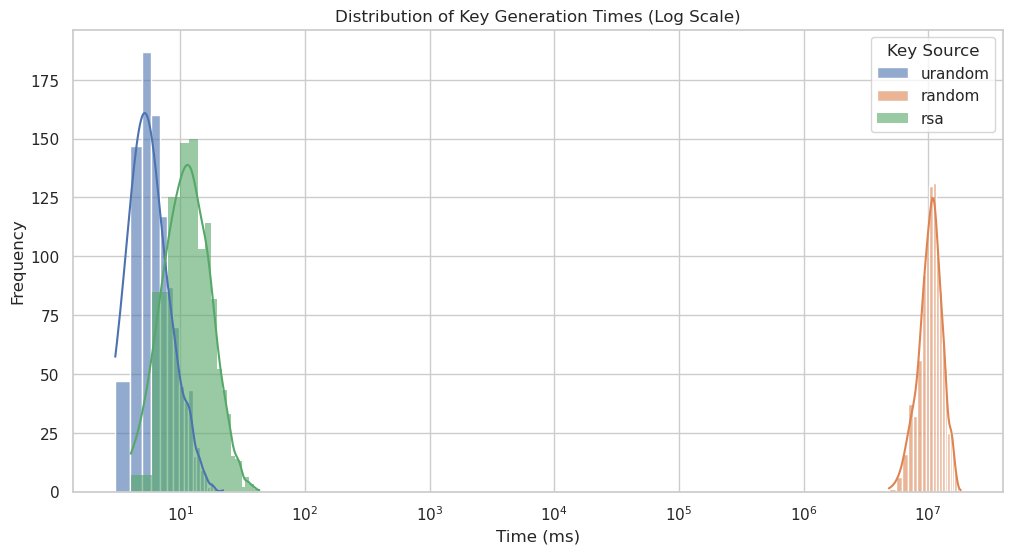

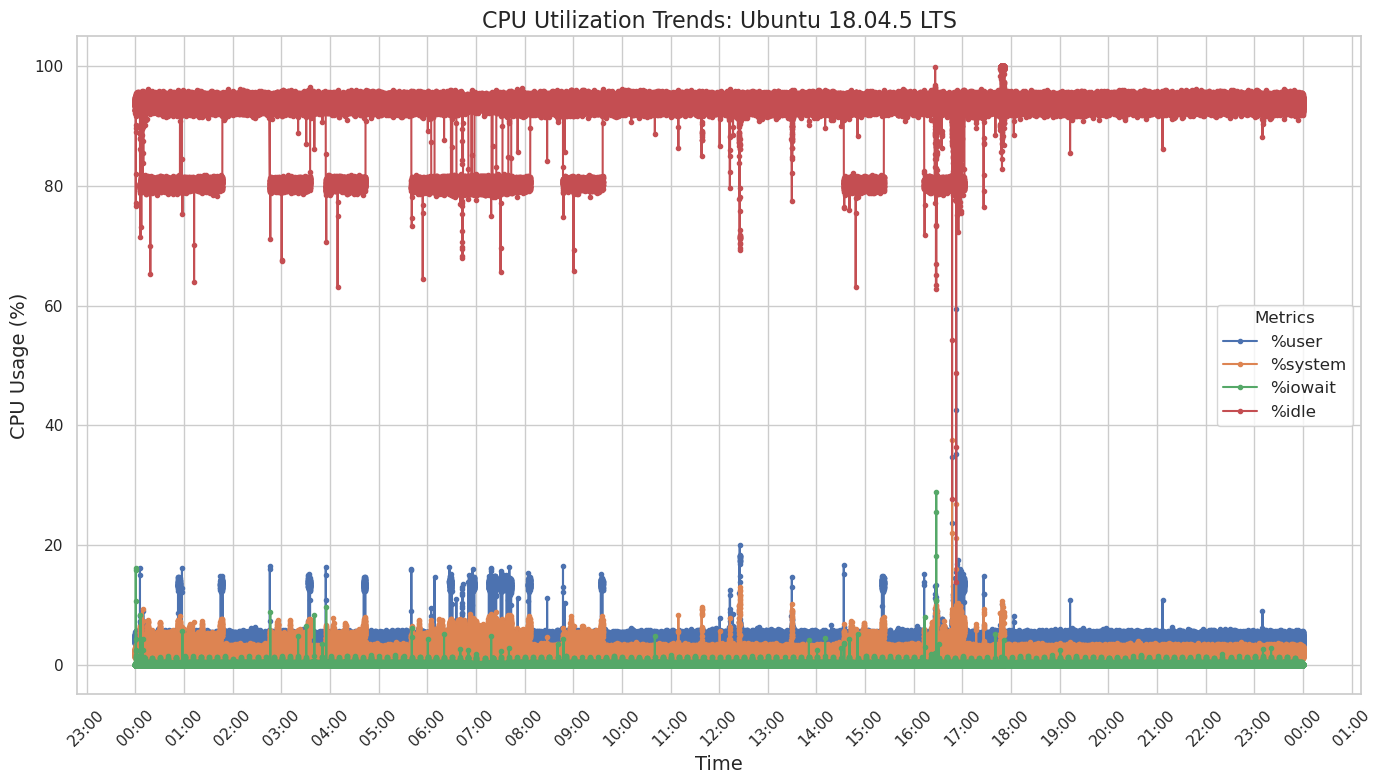

Key Generation Time Statistics for Ubuntu 18.04.5 LTS:
           urandom        random          rsa
count  1000.000000  1.000000e+03  1000.000000
mean      7.024000  1.107365e+07    14.585000
std       3.032263  2.222614e+06     6.238244
min       3.000000  4.834551e+06     4.000000
25%       5.000000  9.609569e+06    10.000000
50%       6.000000  1.099250e+07    13.000000
75%       9.000000  1.251889e+07    18.000000
max      22.000000  1.825398e+07    43.000000
Correlation between mean entropy and key generation time: -0.87


In [114]:
#Analysis of Individual Systems - 01. Ubuntu 18.04.5 LTS
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set up seaborn for better visuals
sns.set(style="whitegrid")

# Helper function to load simple list data from txt file
def load_simple_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data


# Test
#file_path = "data/01. Ubuntu 18.04.5 LTS/random_wait_log.txt"  # Replace with your actual file path
#data = load_simple_data(file_path)
#print(data)  # Prints the list of floating-point numbers

# Load the cleaned performance metrics CSV file
def load_cleaned_system_stats(file_path):
    # Read the cleaned CSV file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Combine 'Time' and 'AM or PM' columns into a single datetime column
    df['datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM or PM'], format='%I:%M:%S %p')
    
    # Drop the original 'Time' and 'AM or PM' columns as they're no longer needed
    df.drop(['Time', 'AM or PM'], axis=1, inplace=True)
    
    return df

system_stats_cleaned = load_cleaned_system_stats("data/01. Ubuntu 18.04.5 LTS/performance_metrics_cleaned.csv")

# Print the first few rows to inspect the data
print(system_stats_cleaned.head())



# Load data for - 01. Ubuntu 18.04.5 LTS
# Example file paths (replace with actual paths)
entropy_urandom = load_simple_data("data/01. Ubuntu 18.04.5 LTS/urandom_entropy_log.txt")
key_times_urandom = load_simple_data("data/01. Ubuntu 18.04.5 LTS/urandom_wait_log.txt")

entropy_random = load_simple_data("data/01. Ubuntu 18.04.5 LTS/random_entropy_log.txt")
key_times_random = load_simple_data("data/01. Ubuntu 18.04.5 LTS/random_wait_log.txt")

entropy_rsa = load_simple_data("data/01. Ubuntu 18.04.5 LTS/rsa_entropy_log.txt")
key_times_rsa = load_simple_data("data/01. Ubuntu 18.04.5 LTS/rsa_wait_log.txt")
#system_stats = load_system_stats("data/01. Ubuntu 18.04.5 LTS/performance_metrics.txt")

print(f"Length of entropy_urandom: {len(entropy_urandom)}")
print(f"Length of entropy_random: {len(entropy_random)}")
print(f"Length of entropy_rsa: {len(entropy_rsa)}")

print(f"Length of key_times_urandom: {len(key_times_urandom)}")
print(f"Length of key_times_random: {len(key_times_random)}")
print(f"Length of key_times_rsa: {len(key_times_rsa)}")


# Convert data to DataFrames for analysis
entropy_df = pd.DataFrame({
    'urandom': entropy_urandom,
    'random': entropy_random,
    'rsa': entropy_rsa
})

time_df = pd.DataFrame({
    'urandom': key_times_urandom,
    'random': key_times_random,
    'rsa': key_times_rsa
})

print(time_df.head())


# --- Analysis and Visualization ---

# 1. Entropy Depletion Analysis
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

#Zoomed to First 50 Keys
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'][:50], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'][:50], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'][:50], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time (First 50 Keys)")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

# 2. Key Generation Time Analysis
# Histogram with Logarithmic x-axis
plt.figure(figsize=(12, 6))
for column in time_df.columns:
    sns.histplot(time_df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Distribution of Key Generation Times (Log Scale)")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.legend(title="Key Source")
plt.xscale('log')  # Apply log scale to x-axis
plt.show()

# 3. CPU usage analysis
def analyze_cpu_usage_line_chart(df, title):
    # Ensure numeric values in CPU metrics
    cpu_metrics = ['%user', '%system', '%iowait', '%idle']
    for metric in cpu_metrics:
        df[metric] = pd.to_numeric(df[metric], errors='coerce')
    
    # Drop rows with missing or invalid numeric values
    df.dropna(subset=cpu_metrics, inplace=True)
    
    # Ensure the 'datetime' column is properly parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    
    # Plot trends for CPU metrics
    plt.figure(figsize=(14, 8))
    for metric in cpu_metrics:
        plt.plot(df['datetime'], df[metric], label=metric, marker=".")
    
    # Formatting the plot
    plt.title(f"CPU Utilization Trends: {title}", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(True)
    
    # Customize the date format for the X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every 3 hours
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
# Call the updated function
analyze_cpu_usage_line_chart(system_stats_cleaned, "Ubuntu 18.04.5 LTS")


# 6. Statistical Analysis
# Example: Mean and standard deviation of key generation times
stats_summary = time_df.describe()
print("Key Generation Time Statistics for Ubuntu 18.04.5 LTS:")
print(stats_summary)

# Example: Correlation between entropy and key generation time
entropy_mean = entropy_df.mean()
time_mean = time_df.mean()
correlation = entropy_mean.corr(time_mean)
print(f"Correlation between mean entropy and key generation time: {correlation:.2f}")


### Explanation of Experimental Output

The experimental results for Ubuntu 18.04.5 LTS indicate the following about the key generation times for different random sources (`urandom`, `random`, and `rsa`):

- **Statistical Summary:**
    - **count**: Indicates the number of samples measured for each source (1,000 samples per category).
    - **mean (Average):**
      - `urandom`: Faster on average, with a mean of 7.02 ms.
      - `random`: Significantly slower with a mean of 11.07 million ms (~3 hours), reflecting its dependency on system entropy.
      - `rsa`: Slower than `urandom` due to computational complexity, with a mean of 14.58 ms.
    - **std (Standard Deviation):**
      - `urandom` and `rsa`: Moderate variability in key generation times.
      - `random`: Higher variability due to fluctuating entropy availability.
    - **min and max**:
      - `urandom`: Consistently fast with a maximum time of 22 ms.
      - `random`: The slowest, with a maximum time of 18.25 million ms (~5 hours).
      - `rsa`: Maximum key generation time of 43 ms, showing more variability compared to `urandom`.
    - **Percentiles (25%, 50%, 75%)**:
      - `urandom`: Tight clustering around the median, indicating consistent performance.
      - `random`: Wide spread, showcasing high dependency on system entropy.
      - `rsa`: More variability in the upper range (75% and max).

- **Correlation:**
    The correlation coefficient between mean entropy and key generation time is -0.87, indicating a strong negative relationship. When entropy decreases, key generation times tend to increase significantly, particularly for `random`.

---
## Ubuntu 19.10

### System Config
- a
- b
- c

   CPU  %user %nice %system %iowait %steal  %idle            datetime
0  all   4.88     0    0.19    0.13      0  94.81 1900-01-01 17:29:20
1  all   6.17     0    0.13       0      0  93.71 1900-01-01 17:29:21
2  all   3.85     0    1.37       0      0  94.79 1900-01-01 17:29:22
3  all   6.56     0    3.47    1.83      0  88.14 1900-01-01 17:29:23
4  all  22.46     0   22.59       0      0  54.95 1900-01-01 17:29:24
Length of entropy_urandom: 2000
Length of entropy_random: 2000
Length of entropy_rsa: 2000
Length of key_times_urandom: 1000
Length of key_times_random: 1000
Length of key_times_rsa: 1000
   urandom     random   rsa
0     53.0  2536613.0   9.0
1     53.0  3287444.0   9.0
2     51.0  3593109.0  10.0
3     52.0  6329006.0  10.0
4     53.0  6721266.0  10.0


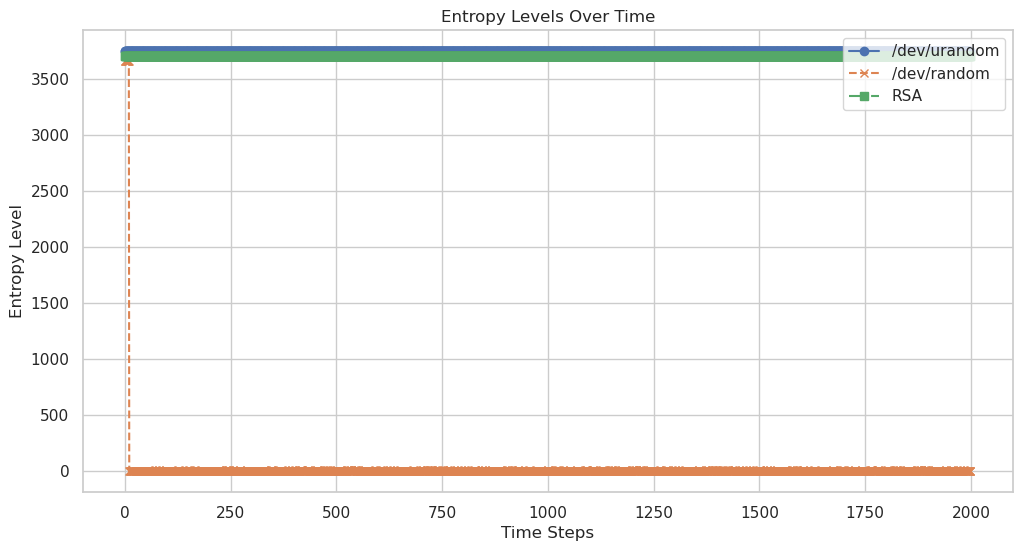

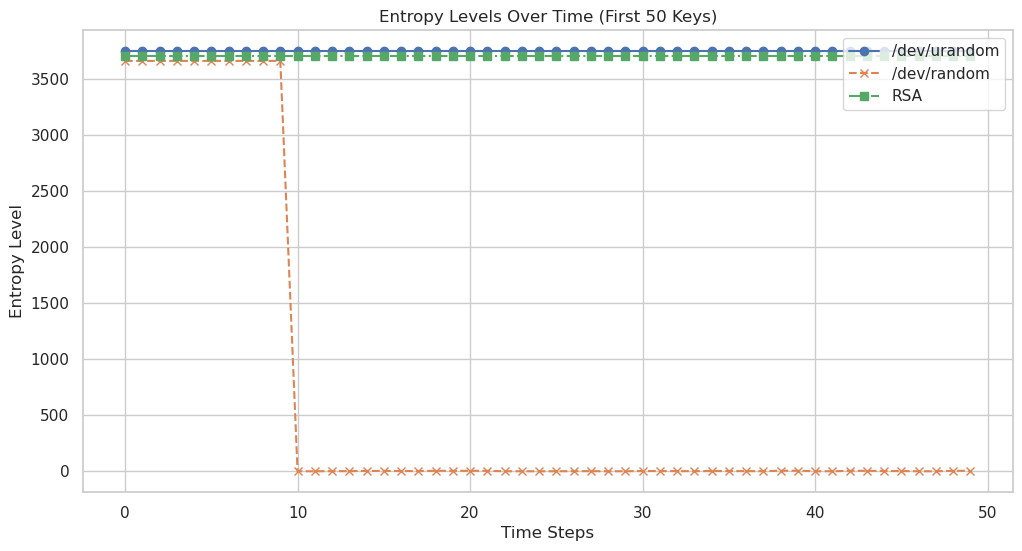

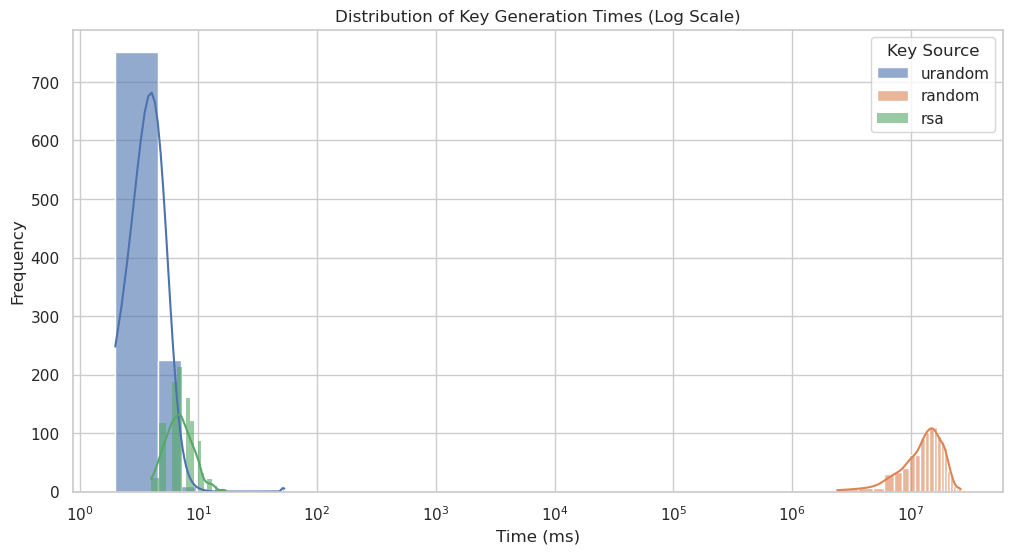

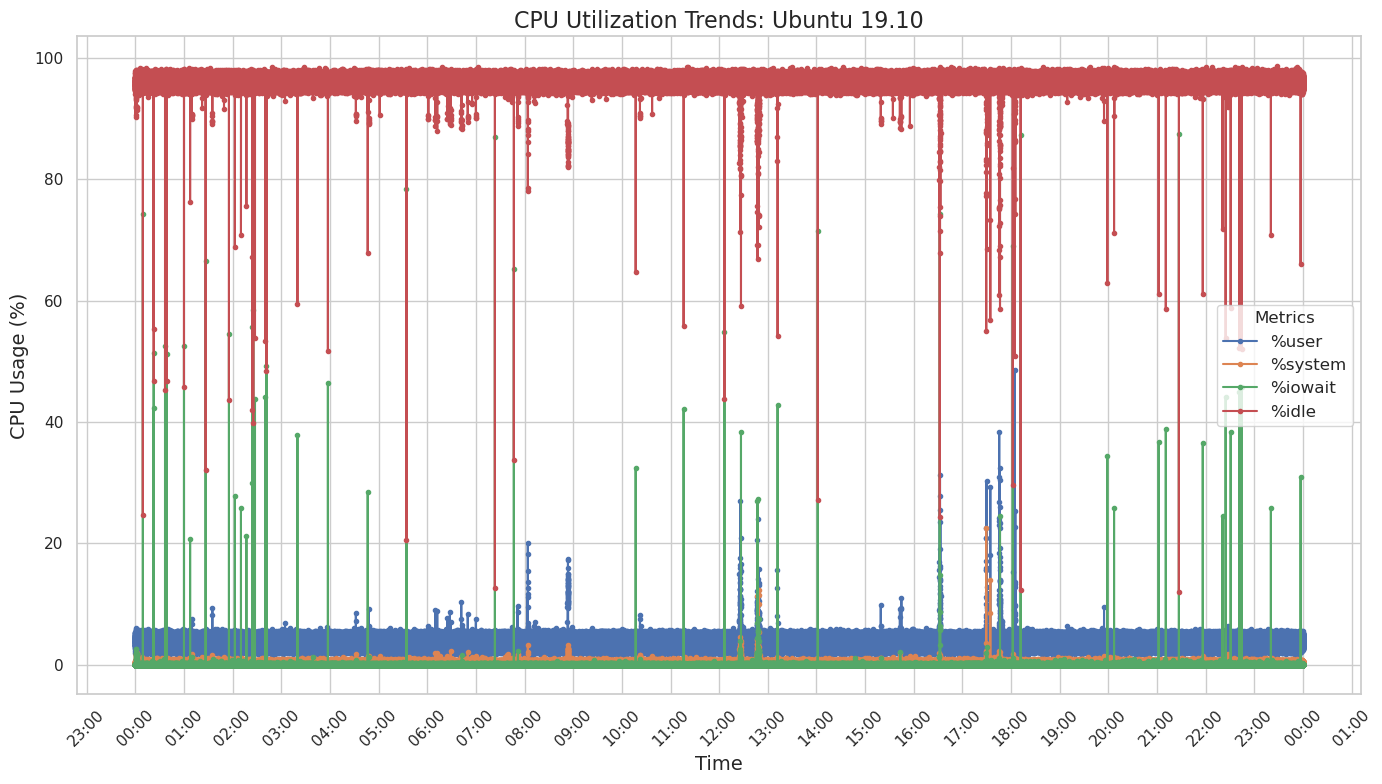

Key Generation Time Statistics for Ubuntu 19.10:
           urandom        random          rsa
count  1000.000000  1.000000e+03  1000.000000
mean      4.646000  1.477628e+07     7.692000
std       4.848318  4.295601e+06     2.228475
min       2.000000  2.388314e+06     4.000000
25%       4.000000  1.197913e+07     6.000000
50%       4.000000  1.484805e+07     7.000000
75%       4.000000  1.783558e+07     9.000000
max      53.000000  2.619349e+07    17.000000
Correlation between mean entropy and key generation time: -1.00


In [137]:
#Analysis of Individual Systems - 02. Ubuntu 19.10
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set up seaborn for better visuals
sns.set(style="whitegrid")

# Helper function to load simple list data from txt file
def load_simple_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data


# Test
#file_path = "data/01. Ubuntu 19.10/random_wait_log.txt"  # Replace with your actual file path
#data = load_simple_data(file_path)
#print(data)  # Prints the list of floating-point numbers

# Load the cleaned performance metrics CSV file
def load_cleaned_system_stats(file_path):
    # Read the cleaned CSV file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Combine 'Time' and 'AM or PM' columns into a single datetime column
    df['datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM or PM'], format='%I:%M:%S %p')
    
    # Drop the original 'Time' and 'AM or PM' columns as they're no longer needed
    df.drop(['Time', 'AM or PM'], axis=1, inplace=True)
    
    return df

system_stats_cleaned = load_cleaned_system_stats("data/01. Ubuntu 19.10/performance_metrics_cleaned.csv")

# Print the first few rows to inspect the data
print(system_stats_cleaned.head())



# Load data for - 01. Ubuntu 19.10
# Example file paths (replace with actual paths)
entropy_urandom = load_simple_data("data/01. Ubuntu 19.10/urandom_entropy_log.txt")
key_times_urandom = load_simple_data("data/01. Ubuntu 19.10/urandom_wait_log.txt")

entropy_random = load_simple_data("data/01. Ubuntu 19.10/random_entropy_log.txt")
key_times_random = load_simple_data("data/01. Ubuntu 19.10/random_wait_log.txt")

entropy_rsa = load_simple_data("data/01. Ubuntu 19.10/rsa_entropy_log.txt")
key_times_rsa = load_simple_data("data/01. Ubuntu 19.10/rsa_wait_log.txt")
#system_stats = load_system_stats("data/01. Ubuntu 19.10/performance_metrics.txt")

print(f"Length of entropy_urandom: {len(entropy_urandom)}")
print(f"Length of entropy_random: {len(entropy_random)}")
print(f"Length of entropy_rsa: {len(entropy_rsa)}")

print(f"Length of key_times_urandom: {len(key_times_urandom)}")
print(f"Length of key_times_random: {len(key_times_random)}")
print(f"Length of key_times_rsa: {len(key_times_rsa)}")


# Convert data to DataFrames for analysis
entropy_df = pd.DataFrame({
    'urandom': entropy_urandom,
    'random': entropy_random,
    'rsa': entropy_rsa
})

time_df = pd.DataFrame({
    'urandom': key_times_urandom,
    'random': key_times_random,
    'rsa': key_times_rsa
})

print(time_df.head())


# --- Analysis and Visualization ---

# 1. Entropy Depletion Analysis
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

#Zoomed to First 50 Keys
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'][:50], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'][:50], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'][:50], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time (First 50 Keys)")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

# 2. Key Generation Time Analysis
# Histogram with Logarithmic x-axis
plt.figure(figsize=(12, 6))
for column in time_df.columns:
    sns.histplot(time_df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Distribution of Key Generation Times (Log Scale)")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.legend(title="Key Source")
plt.xscale('log')  # Apply log scale to x-axis
plt.show()

# 3. CPU usage analysis
def analyze_cpu_usage_line_chart(df, title):
    # Ensure numeric values in CPU metrics
    cpu_metrics = ['%user', '%system', '%iowait', '%idle']
    for metric in cpu_metrics:
        df[metric] = pd.to_numeric(df[metric], errors='coerce')
    
    # Drop rows with missing or invalid numeric values
    df.dropna(subset=cpu_metrics, inplace=True)
    
    # Ensure the 'datetime' column is properly parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    
    # Plot trends for CPU metrics
    plt.figure(figsize=(14, 8))
    for metric in cpu_metrics:
        plt.plot(df['datetime'], df[metric], label=metric, marker=".")
    
    # Formatting the plot
    plt.title(f"CPU Utilization Trends: {title}", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(True)
    
    # Customize the date format for the X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every 3 hours
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
# Call the updated function
analyze_cpu_usage_line_chart(system_stats_cleaned, "Ubuntu 19.10")


# 6. Statistical Analysis
# Example: Mean and standard deviation of key generation times
stats_summary = time_df.describe()
print("Key Generation Time Statistics for Ubuntu 19.10:")
print(stats_summary)

# Example: Correlation between entropy and key generation time
entropy_mean = entropy_df.mean()
time_mean = time_df.mean()
correlation = entropy_mean.corr(time_mean)

print(f"Correlation between mean entropy and key generation time: {correlation:.2f}")


### Explanation of Experimental Output

The experimental results for Ubuntu 19.10 indicate the following about the key generation times for different random sources (`urandom`, `random`, and `rsa`):

- **Statistical Summary:**
    - **count**: Indicates the number of key generation samples measured (1,000 samples for each source).
    - **mean**: The average key generation time across the samples.
      - `urandom`: Fastest on average with 4.65 ms.
      - `random`: Significantly slower due to dependency on system entropy, with an average of 14.78 million ms (approximately 4 hours).
      - `rsa`: Slower than `urandom` due to computational complexity, with an average of 7.69 ms.
    - **std (Standard Deviation)**: Measures variability in key generation times.
      - `urandom` and `rsa`: Low variability.
      - `random`: High variability due to the fluctuating availability of entropy.
    - **min and max**: The shortest and longest key generation times observed.
      - `random` exhibits the highest maximum value (26.19 million ms, about 7.3 hours), illustrating its dependency on entropy.
    - **Percentiles (25%, 50%, 75%)**: Provide a detailed look at the distribution of key generation times.
      - `urandom` and `rsa` times are clustered tightly around the median (50%).
      - `random` shows a wide spread, reinforcing its high variability.

- **Correlation:**
    The correlation coefficient between mean entropy and key generation time is -1.00, indicating a perfect inverse relationship. As system entropy decreases, the key generation time increases sharply, especially for entropy-dependent sources like `random`.



---
## Fedora 40

### System Config
- a
- b
- c

   CPU  %user  %nice  %system  %iowait  %steal  %idle            datetime
0  all   0.18    0.0     0.58     0.01       0  99.22 1900-01-01 00:10:24
1  all   0.17    0.0     0.57     0.01       0  99.25 1900-01-01 00:20:48
2  all   0.17    0.0     0.57     0.01       0  99.24 1900-01-01 00:30:47
3  all   0.17    0.0     0.56     0.01       0  99.25 1900-01-01 00:40:24
4  all   0.17    0.0     0.57     0.01       0  99.25 1900-01-01 00:50:47
Length of entropy_urandom: 2000
Length of entropy_random: 2000
Length of entropy_rsa: 2000
Length of key_times_urandom: 1000
Length of key_times_random: 1000
Length of key_times_rsa: 1000
   urandom  random  rsa
0      4.0     4.0  7.0
1      4.0     4.0  7.0
2      4.0     4.0  7.0
3      4.0     4.0  7.0
4      4.0     4.0  8.0


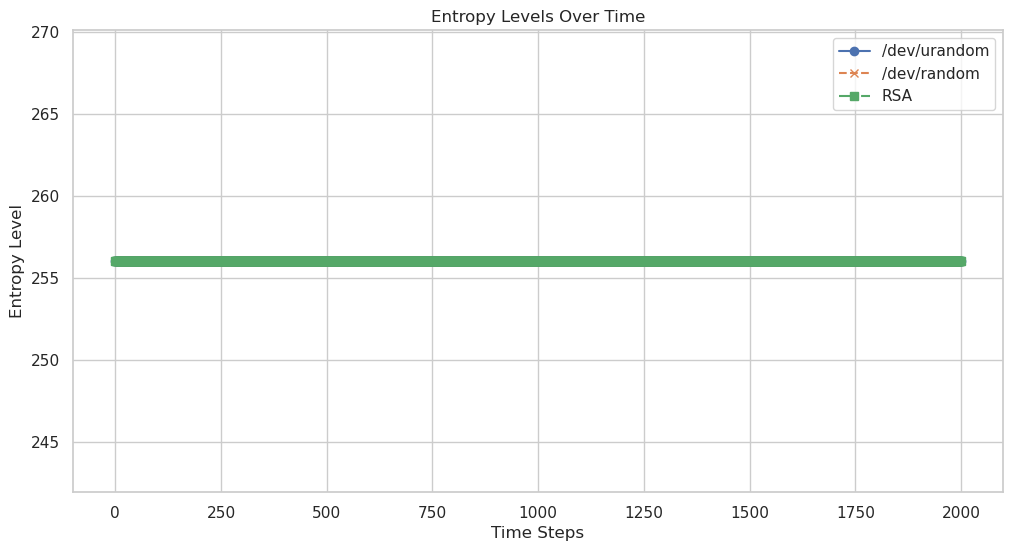

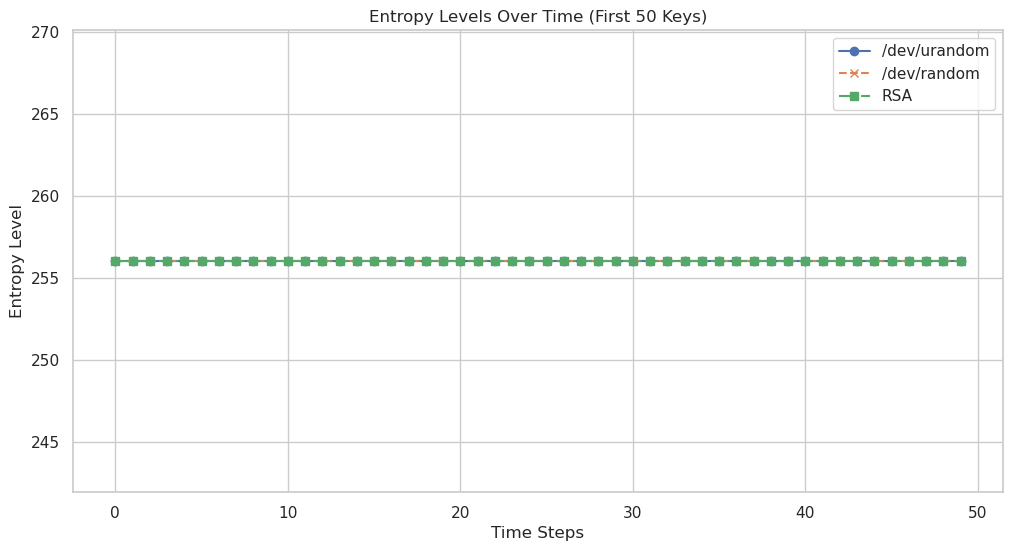

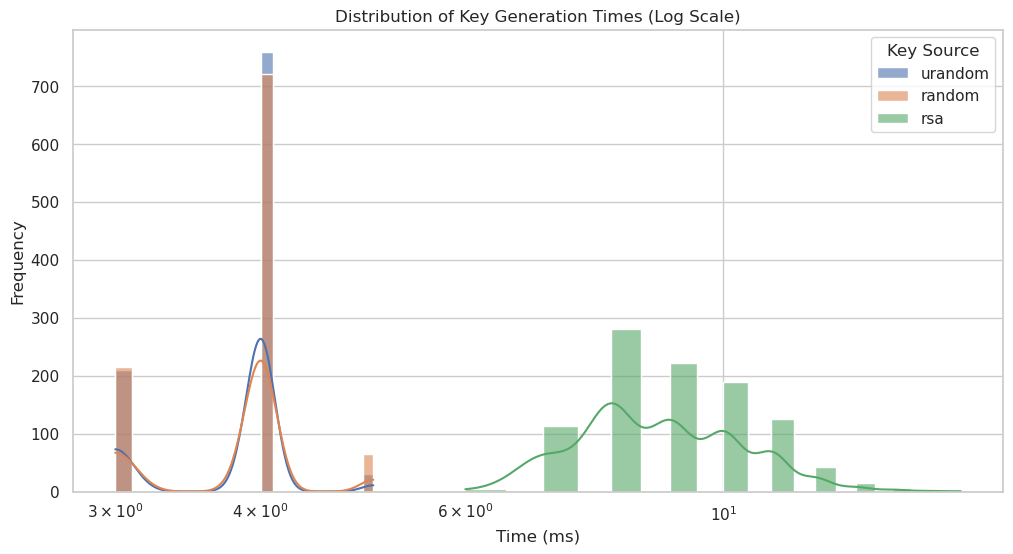

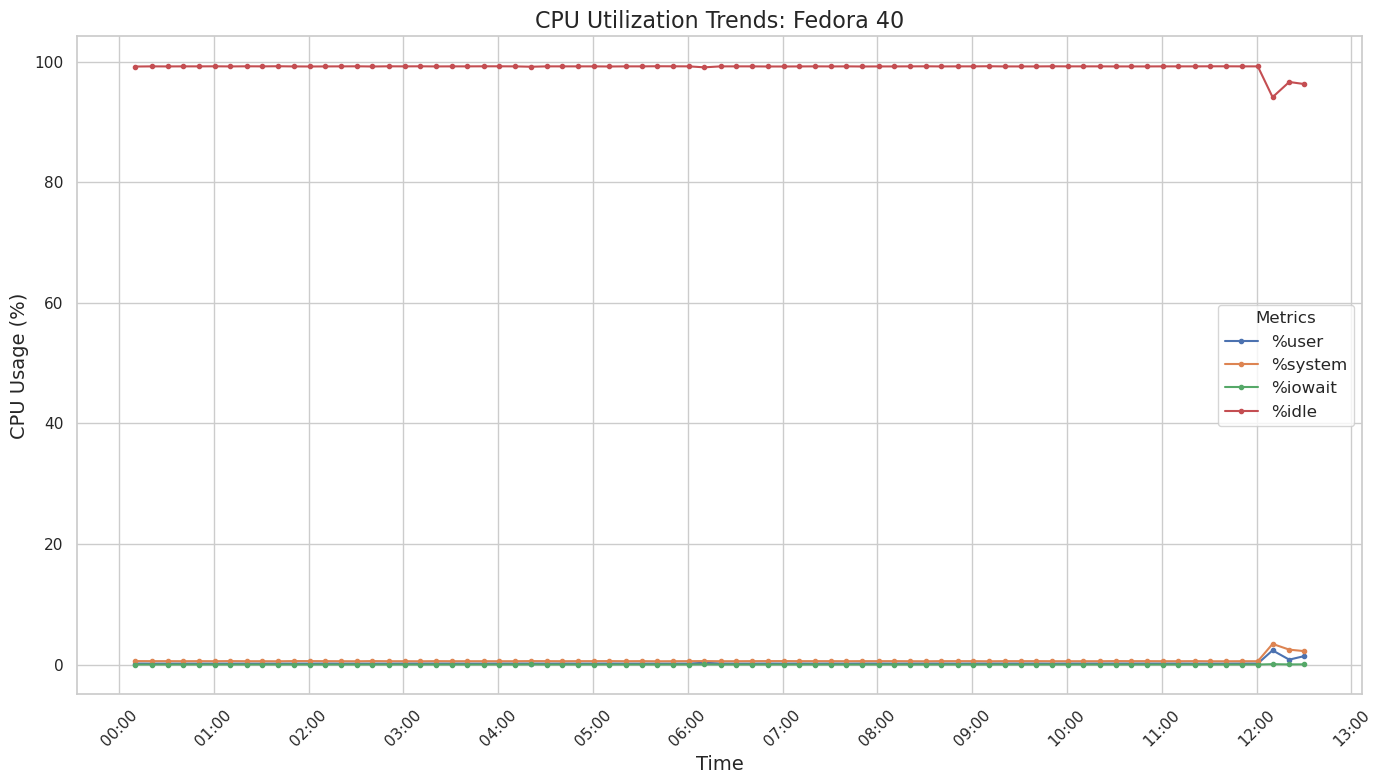

Key Generation Time Statistics for Fedora 40:
           urandom       random          rsa
count  1000.000000  1000.000000  1000.000000
mean      3.821000     3.851000     9.154000
std       0.457349     0.507007     1.522696
min       3.000000     3.000000     6.000000
25%       4.000000     4.000000     8.000000
50%       4.000000     4.000000     9.000000
75%       4.000000     4.000000    10.000000
max       5.000000     5.000000    16.000000
The following columns have constant values (zero variance): ['urandom', 'random', 'rsa']
Correlation cannot be computed for these columns because standard deviation is zero.
In this experiment, the entropy values for the sources (e.g., urandom, random, rsa) are constant, resulting in zero variance. As a result, the Pearson correlation cannot be computed because it involves division by the standard deviation. This outcome aligns with the expected outcome, as the entropy levels are stuck at 256 regardless of the load.


In [142]:
#Analysis of Individual Systems - 03. Fedora 40
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Set up seaborn for better visuals
sns.set(style="whitegrid")

# Helper function to load simple list data from txt file
def load_simple_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data


# Test
#file_path = "data/01. Fedora 40/random_wait_log.txt"  # Replace with your actual file path
#data = load_simple_data(file_path)
#print(data)  # Prints the list of floating-point numbers

# Load the cleaned performance metrics CSV file
def load_cleaned_system_stats(file_path):
    # Read the cleaned CSV file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Combine 'Time' and 'AM or PM' columns into a single datetime column
    df['datetime'] = pd.to_datetime(df['Time'] + ' ' + df['AM or PM'], format='%I:%M:%S %p')
    
    # Drop the original 'Time' and 'AM or PM' columns as they're no longer needed
    df.drop(['Time', 'AM or PM'], axis=1, inplace=True)
    
    return df

system_stats_cleaned = load_cleaned_system_stats("data/01. Fedora 40/performance_metrics_cleaned.csv")

# Print the first few rows to inspect the data
print(system_stats_cleaned.head())



# Load data for - 01. Fedora 40
# Example file paths (replace with actual paths)
entropy_urandom = load_simple_data("data/01. Fedora 40/urandom_entropy_log.txt")
key_times_urandom = load_simple_data("data/01. Fedora 40/urandom_wait_log.txt")

entropy_random = load_simple_data("data/01. Fedora 40/random_entropy_log.txt")
key_times_random = load_simple_data("data/01. Fedora 40/random_wait_log.txt")

entropy_rsa = load_simple_data("data/01. Fedora 40/rsa_entropy_log.txt")
key_times_rsa = load_simple_data("data/01. Fedora 40/rsa_wait_log.txt")
#system_stats = load_system_stats("data/01. Fedora 40/performance_metrics.txt")

print(f"Length of entropy_urandom: {len(entropy_urandom)}")
print(f"Length of entropy_random: {len(entropy_random)}")
print(f"Length of entropy_rsa: {len(entropy_rsa)}")

print(f"Length of key_times_urandom: {len(key_times_urandom)}")
print(f"Length of key_times_random: {len(key_times_random)}")
print(f"Length of key_times_rsa: {len(key_times_rsa)}")


# Convert data to DataFrames for analysis
entropy_df = pd.DataFrame({
    'urandom': entropy_urandom,
    'random': entropy_random,
    'rsa': entropy_rsa
})

time_df = pd.DataFrame({
    'urandom': key_times_urandom,
    'random': key_times_random,
    'rsa': key_times_rsa
})

print(time_df.head())


# --- Analysis and Visualization ---

# 1. Entropy Depletion Analysis
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

#Zoomed to First 50 Keys
plt.figure(figsize=(12, 6))
plt.plot(entropy_df['urandom'][:50], label="/dev/urandom", linestyle="-", marker="o")
plt.plot(entropy_df['random'][:50], label="/dev/random", linestyle="--", marker="x")
plt.plot(entropy_df['rsa'][:50], label="RSA", linestyle="-.", marker="s")
plt.title("Entropy Levels Over Time (First 50 Keys)")
plt.xlabel("Time Steps")
plt.ylabel("Entropy Level")
plt.legend(loc='upper right')
plt.show()

# 2. Key Generation Time Analysis
# Histogram with Logarithmic x-axis
plt.figure(figsize=(12, 6))
for column in time_df.columns:
    sns.histplot(time_df[column], kde=True, bins=20, label=column, alpha=0.6)
plt.title("Distribution of Key Generation Times (Log Scale)")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.legend(title="Key Source")
plt.xscale('log')  # Apply log scale to x-axis
plt.show()

# 3. CPU usage analysis
def analyze_cpu_usage_line_chart(df, title):
    # Ensure numeric values in CPU metrics
    cpu_metrics = ['%user', '%system', '%iowait', '%idle']
    for metric in cpu_metrics:
        df[metric] = pd.to_numeric(df[metric], errors='coerce')
    
    # Drop rows with missing or invalid numeric values
    df.dropna(subset=cpu_metrics, inplace=True)
    
    # Ensure the 'datetime' column is properly parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    
    # Plot trends for CPU metrics
    plt.figure(figsize=(14, 8))
    for metric in cpu_metrics:
        plt.plot(df['datetime'], df[metric], label=metric, marker=".")
    
    # Formatting the plot
    plt.title(f"CPU Utilization Trends: {title}", fontsize=16)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(True)
    
    # Customize the date format for the X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every 3 hours
    
    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
# Call the updated function
analyze_cpu_usage_line_chart(system_stats_cleaned, "Fedora 40")


# 6. Statistical Analysis
# Example: Mean and standard deviation of key generation times
stats_summary = time_df.describe()
print("Key Generation Time Statistics for Fedora 40:")
print(stats_summary)

# Correlation between entropy and key generation time
# Check for constant columns
constant_columns = entropy_df.columns[entropy_df.std() == 0]

if not constant_columns.empty:
    print(f"The following columns have constant values (zero variance): {constant_columns.tolist()}")
    print("Correlation cannot be computed for these columns because standard deviation is zero.")
    explanation = (
        "In this experiment, the entropy values for the sources (e.g., urandom, random, rsa) "
        "are constant, resulting in zero variance. As a result, the Pearson correlation cannot "
        "be computed because it involves division by the standard deviation. This outcome aligns "
        "with the expected outcome, as the entropy levels are stuck at 256 regardless of the load."
    )
    print(explanation)
else:

    entropy_mean = entropy_df.mean()
    time_mean = time_df.mean()
    correlation = entropy_mean.corr(time_mean)
    print(f"Correlation between mean entropy and key generation time: {correlation:.2f}")


### Explanation of Experimental Output

The experimental results for Fedora 40 indicate the following about the key generation times for different random sources (`urandom`, `random`, and `rsa`):

- **Statistical Summary:**
  - **Mean**: On average, `urandom` and `random` show similar key generation times (around 3.82 ms and around 3.85 ms, respectively), while RSA operations are slower (around 9.15 ms on average).
  - **Standard Deviation (std)**: RSA exhibits higher variability (around 1.52 ms) compared to `urandom` and `random` (around 0.45â€“0.51 ms).
  - **Range**: The minimum times for all sources are consistent (3 ms for `urandom` and `random`, 6 ms for RSA). However, RSA has a much wider range of times (up to 16 ms), suggesting greater inconsistency in performance.
  - **Zero Variance**: The entropy levels across these sources are constant during the experiment, resulting in zero variance.


- **Entropy Behavior**:
  The entropy values for all sources (`urandom`, `random`, and RSA) were observed to remain constant at 256.


### Why Entropy is Stuck at 256

The linux kernel version of Fedora 40 is 6.11.8. Based on the Linux documentation for RNG enhancements in versions 5.17 and 5.18, there has been a unification that ensures both `/dev/random` and `/dev/urandom` now function identically, providing the same cryptographically secure random numbers. This change removed the discrepancies between blocking (waiting for entropy) and non-blocking sources. Also, starting from Linux 5.4, the kernel introduced mechanisms to actively add entropy using techniques like jitter from CPU cycle counters. This prevents entropy depletion and ensures that the system can very quickly replenish entropy to the maximum level, which has been set to 256.